In [2]:
%matplotlib inline

import setGPU

import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

setGPU: Setting GPU to: 4


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from plots import loadModel

In [35]:
gen_model = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [36]:
gen_weights = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_1350_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'

In [37]:
g = loadModel(gen_model)

In [38]:
g.load_weights(gen_weights)

In [39]:
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 16, 16, 55)        1458103   
Total params: 1,458,103
Trainable params: 1,457,719
Non-trainable params: 384
_________________________________________________________________


In [40]:
latent_space=100
batch_size=128

In [41]:
noise = np.random.normal(0, 1, (batch_size, latent_space))

In [42]:
generated_images = g.predict(noise)

In [13]:
#generated_images.shape

In [12]:
#generated_images = generated_images.squeeze()

In [43]:
generated_images[10, :, :, 12].shape

(16, 16)

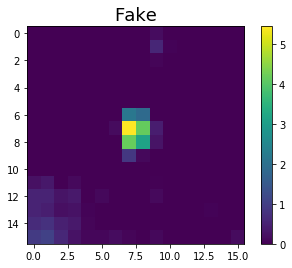

In [44]:
plt.imshow(generated_images[10, :, :, 12])
plt.colorbar()
plt.title("Fake", size=18)

In [45]:
gen_red = np.sum(generated_images, axis=3)

In [46]:
gen_red.shape

(128, 16, 16)

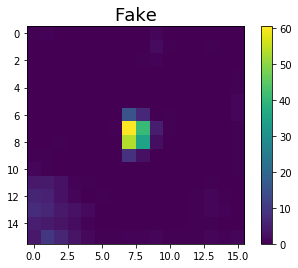

In [47]:
plt.imshow(gen_red[10, :, :])
plt.title("Fake", size=18)
plt.colorbar()

In [15]:
f = h5py.File('/bigdata/shared/HGCAL_data/new_multi_small/no_pu/ntuple_merged_159_no_pu.h5', 'r')

In [16]:
X = np.asarray(f['X'])

In [17]:
X = X.squeeze()

In [18]:
X[10, :, :, 12].shape

(16, 16)

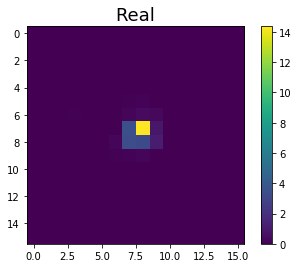

In [32]:
plt.imshow(X[10, :, :, 12])
plt.title("Real", size=18)
plt.colorbar()

In [22]:
X.shape

(58, 16, 16, 55)

In [24]:
red = np.sum(X, axis=3)

In [24]:
red.shape

(58, 16, 16)

In [28]:
red2 = np.sum(X, axis=(0, 3))

In [29]:
red2.shape

(16, 16)

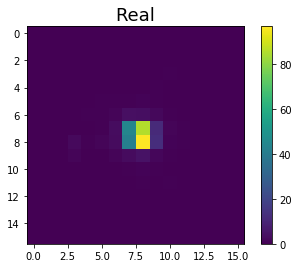

In [34]:
plt.imshow(red[10, :, :])
plt.title("Real", size=18)
plt.colorbar()

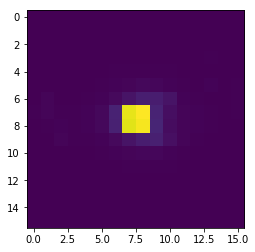

In [30]:
plt.imshow(red2)